#Clustering-K-Means

Unsupervised learning clustering technique


In [3]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy as sp
print('scipy:', sp.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import matplotlib.pyplot as plt

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

import pandas as pd
print('pandas', pd.__version__)

IPython: 3.1.0
numpy: 1.9.2
scipy: 0.15.1
matplotlib: 1.4.3
scikit-learn: 0.16.1
seaborn 0.5.1
pandas 0.16.0


In [4]:
from scipy import stats
%matplotlib inline

In [5]:
seaborn.set()

##Introduction

**Kmeans** is an algorithm for **unsupervised clustering**. It finds clusters in data based on attributes of the data alone (not labels) thats why its unsupervised. It works by searching for cluster centers. Cluster centersa are just the mean of the points within them. Basically every point is closest to the cluster center that it is assigned to. 

In [6]:
from sklearn.datasets.samples_generator import make_blobs

In [7]:
xBlobs, yBlobs = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

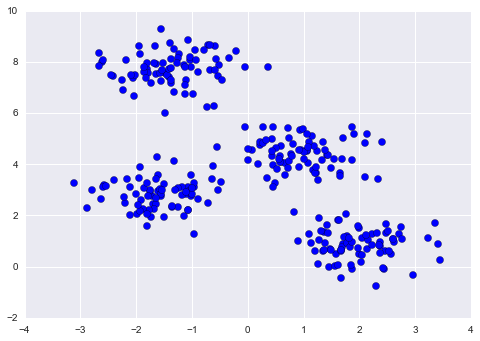

In [8]:
plt.scatter(xBlobs[:, 0], xBlobs[:, 1], s=50)

Seems obvious what the different clusters here are but if were to do an exhaustive search for different data segmentations then search space would actually be exponential in number of points (eek!). But there is an _Expectations Maximization (EM)_ procedure scikitlearn implements. This means Kmeans can be solved relatively quickly

In [9]:
from sklearn.cluster import KMeanseans

In [10]:
KMeansans?

In [11]:
estimator = KMeans(4)

In [15]:
estimator.fit(xBlobs)
yKMeans = estimator.predict(xBlobs)

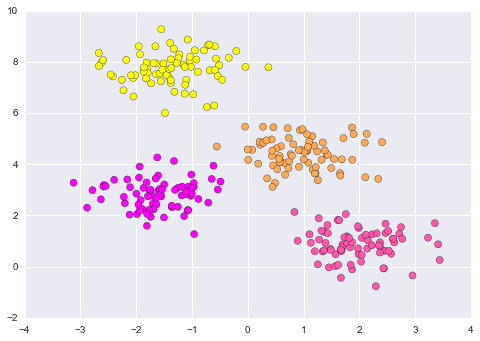

In [18]:
plt.scatter(xBlobs[:, 0], xBlobs[:, 1], c=yKMeans, cmap='spring', s=50)

Here our alg has identified the four cluster points in a way that is very similar to what we would do with our own eye! Super cool!

##K-Means Algorithm: Expectation Maximization

Expectation Max is a two step approach:
- Guess some cluster centers
- Repeated untill converged A. Assign points to nearest cluster center B. Set cluster centers to the mean

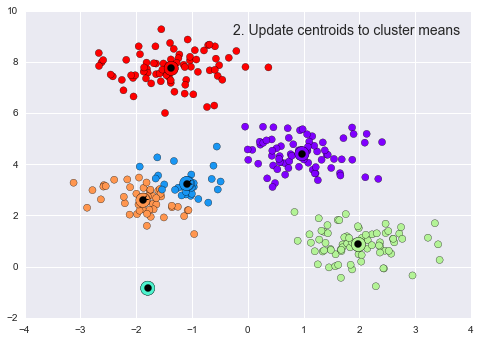

In [20]:
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive()

So effing cool

###K-Means Caveats

Alg convergence not always guranteed. So by default sckitlearn used large number of random initilizaitons and finds the best results. Random initilizaitons being the random starting points. Also note that the number of clusters has to be set beforehand. Other clustering algorithms can avoid this requirements which is pretty cool. 

##KMeans Application to Digits

Use KMeans to automatically cluster the data in 64 dimensions. We will then look at the cluster centers to see what our algorithm finds. 

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()

In [22]:
kmeansDigitEstimator = KMeans(n_clusters=10)

In [26]:
kmeansDigitEstimator.fit(digits.data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [37]:
clusters = kmeansDigitEstimator.predict(digits.data)

In [38]:
print('shape of cluster centers', kmeansDigitEstimator.cluster_centers_.shape)

shape of cluster centers (10, 64)


We have 10 clusters in 64 dimensions. We want to visualize each of these to see what they represent. 


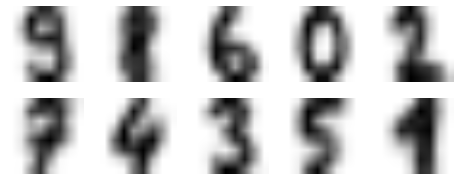

In [39]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(kmeansDigitEstimator.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

Wow, so even without labels, kMeans is able to find clusters whose means are recognizable digits. Fix the fact that the cluster labels are permuted.

In [40]:
from scipy.stats import mode

In [42]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]

Now use our PCA visualization and look at the true cluster labels and K-means cluster labels

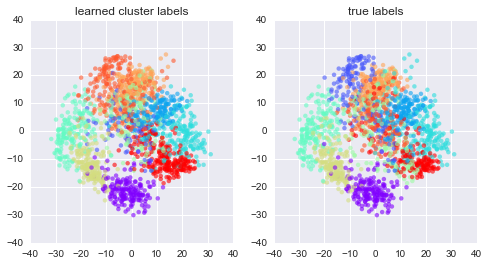

In [44]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

Lets look at how accurate Kmeans was with no label information

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79187534780189206

In [48]:
from sklearn.metrics import confusion_matrix

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   6   3   2   0   6   2   3 100  52]
 [  0  20   0   6   0   7   0   7   1 139]]


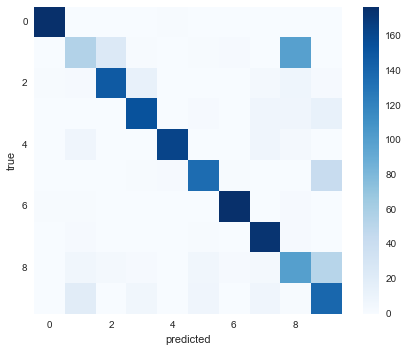

In [56]:
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

This is pretty effing crazy. We have 80% accuracy for an entirely unsupervised learning algorithm that didn't know anything whats so ever about labels

##Example: Kmeans For Color Compression

Really cool application for clustering is actually color image compression. Say we have an image with millions of colors. For most images a lot of colors will actually be unused and conversely large number of pixels will have the same of very similar colors 

In [57]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')

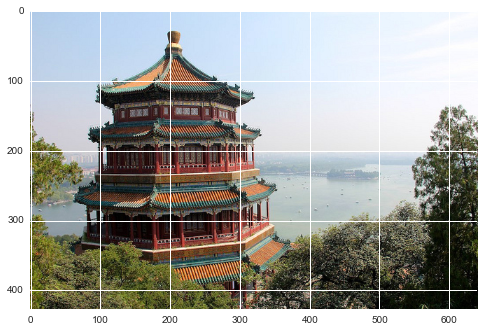

In [58]:
plt.imshow(china)

In [60]:
#image is stored in 3 dimensional array of size(height, width, RGB)
print('shape of china image', china.shape)

shape of china image (427, 640, 3)


Think of this iamge as cloud of points in 3-dimensional color space. We are going to rescale the colors so that they lie between 0 and 1. We will then reshape the array to be a typical sckit-learn input: 

In [64]:
chinaX = pd.DataFrame((china / 255.0).reshape(-1, 3))

In [65]:
print('new shape of china image', chinaX.shape)

new shape of china image (273280, 3)


Now have 273280 points in 3 dimensions. So we want to compress these 256^3 colors into a smaller number (roughly 64 colors). We want to find color clusters! Holy shit!. We want to find N_color clusters in our data. We will then make a new image where the true input color is replaced by the color of the closest clsuter.

In [74]:
#Reduce size of image for speed reasons
image = china[::3, ::3]
n_colors = 64
chinaX = ( image / 255.0).reshape(-1,3)

model = KMeans(n_colors)
labels = model.fit_predict(chinaX)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

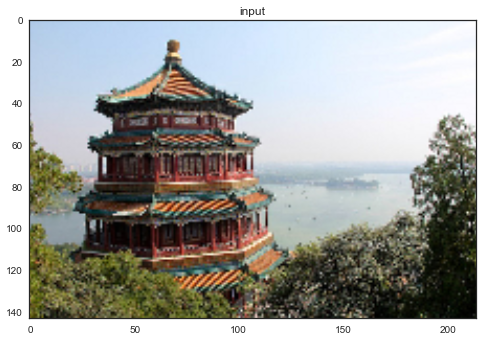

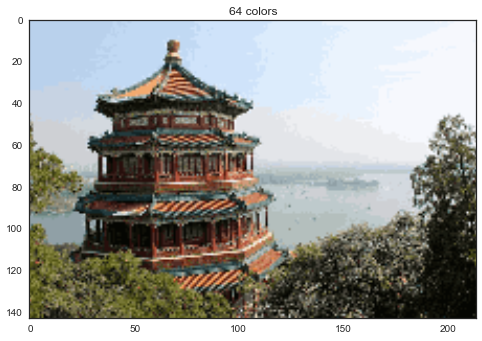

In [78]:
#Create and plot the new image
with seaborn.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')
    
    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

Compare the input and output image: we've reduced the $256^3$ colors to just 64.

In [79]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ..., 
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ..., 
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ..., 
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ..., 
       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ..., 
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ..., 
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ..., 
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,

In [81]:
chinaX

array([[ 0.68235294,  0.78823529,  0.90588235],
       [ 0.68235294,  0.78823529,  0.90588235],
       [ 0.68235294,  0.78823529,  0.90588235],
       ..., 
       [ 0.01176471,  0.01176471,  0.01176471],
       [ 0.03529412,  0.04313725,  0.02352941],
       [ 0.05882353,  0.09411765,  0.02745098]])